## Separa os dados em treino e teste, treina o modelo, faz os testes, verifica os resultados, faz os ajustes necessários e avalia se o modelo pode ser usado para predizer o consumo de cerveja.

In [129]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [130]:
# le os dados do dataset tratado recebendo em formato de dataframe
dfx = pd.read_csv('arquivos_tratados/df_consumo_cerveja.csv')

In [131]:
# verificando se todos os dados foram carregados
dfx.shape

(365, 7)

In [132]:
# verifica as colunas e linhas carregadas
dfx.head(3)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814


In [133]:
# separa as variáveis: dependente_y e independentes_x
# as variáveis independentes (x) são separadas da variável dependente (y) em dataframes diferentes
Xi = dfx[["temp_media", "temp_max", 'fim_semana']]
yi = dfx[['cons_litros']]

In [134]:
# verifica o Dtype das variáveis independentes
print(Xi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_media  365 non-null    float64
 1   temp_max    365 non-null    float64
 2   fim_semana  365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB
None


In [135]:
# Faz a separação dos dados de treino X_train e y_train e de teste X_test e y_test
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.30, train_size=0.70, random_state=2)

In [136]:
# Criando a arquitetura da rede neural:
k_model = Sequential() # cria o modelo

k_model.add(Dense(units=5, # inclui uma camada intermediária com 5 neurônios
                 activation='relu', # função de ativação
                 input_dim=Xi_train.shape[1])) # passa a dimensão do df xi_train

k_model.add(Dense(units=1, # inclui a camada de saída com 1 neurônio apenas (temos 1 variável de saída)
                 activation='linear')) # função de ativação

In [137]:
# compila o modelo:
k_model.compile(loss='mse', # função de perda/custo, ajuda a minimizar o erro, diferença do previsto e calculado
                            # mse(erro quadrático médio) mede a quantidade de erros
                optimizer='adam', # otimização de adam, ajuda a aprender com eficiência e convergir para soluções
                                  # ideais
                metrics=['mae']) # métricas a serem avaliadas, mae(erro médio absoluto)

In [138]:
# treina a rede neural:
resultado = k_model.fit(Xi_train, yi_train, # dados de treino
                       epochs=200, # determina quantas vezes o modelo passará pelo conjunto de treinamento 
                                   # xi_train e yi_train
                       batch_size=32, # determina o nro de exemplos(linhas) contido no conjunto de treinamento, que
                                      # será utilizado de uma vez para atualizar os pesos antes de prosseguir com 
                                      # o treinamento
                       validation_data=(Xi_test, yi_test)) # ajuda a achar o ponto ideal do treinamento evitando
                                                           # overfit e underfit 

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 5387.5601 - mae: 72.6753 - val_loss: 5205.4541 - val_mae: 71.3630
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4990.9844 - mae: 69.9538 - val_loss: 4957.4375 - val_mae: 69.6405
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4927.2817 - mae: 69.4872 - val_loss: 4719.0625 - val_mae: 67.9439
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4641.4370 - mae: 67.3637 - val_loss: 4493.6724 - val_mae: 66.2996
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4484.1968 - mae: 66.2324 - val_loss: 4277.6514 - val_mae: 64.6845
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4097.9199 - mae: 63.3355 - val_loss: 4074.1201 - val_mae: 63.1250
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3984.6716 - mae: 62.4631 - val_loss: 3879.3228 - val_mae: 61.5954
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3801.3738 - mae: 60.9456 - val_loss: 3694.1680 - val_mae: 60.1054
Epoch 9/

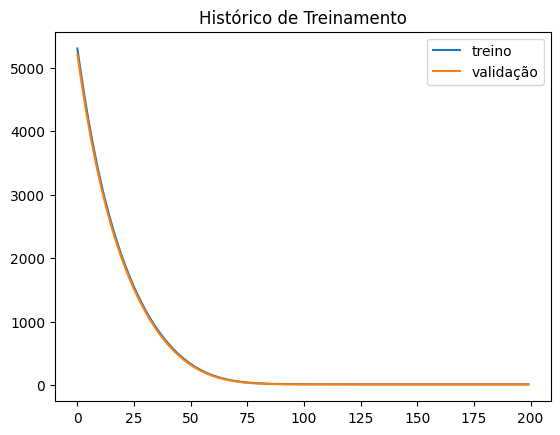

In [139]:
# Plotando gráfico do histórico de treinamento, verificando o erro de treino e de teste
plt.plot(resultado.history["loss"], label="loss")
plt.plot(resultado.history["val_loss"], label="val_loss")
plt.title('Histórico de Treinamento')
plt.legend(['treino', 'validação'])
plt.show()

In [140]:
# o df de teste tem 3 colunas (variáveis independentes)
Xi_test.shape

(110, 3)

In [141]:
# fazendo uma predição com os dados de teste
# será feito uma predição para cada linha do xi_test na mesma unidade de cons_litros
xi_teste_pred = k_model.predict(Xi_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [142]:
# exibe o array com o resultado da predição
xi_teste_pred

array([[23.790583],
       [20.404182],
       [25.229795],
       [18.183165],
       [21.18075 ],
       [26.383635],
       [23.958145],
       [18.846788],
       [20.207935],
       [26.44073 ],
       [26.227242],
       [29.500946],
       [29.77287 ],
       [27.053797],
       [26.235552],
       [30.011286],
       [26.985802],
       [25.901299],
       [26.954588],
       [29.116325],
       [23.29356 ],
       [21.383095],
       [25.658062],
       [23.821665],
       [24.244535],
       [26.914597],
       [19.866982],
       [24.963568],
       [24.13374 ],
       [23.916819],
       [29.232645],
       [19.732115],
       [27.159058],
       [29.731243],
       [26.495432],
       [20.38203 ],
       [24.257473],
       [18.51976 ],
       [26.184856],
       [29.16217 ],
       [21.60566 ],
       [28.923946],
       [34.329727],
       [21.894632],
       [25.919577],
       [27.425291],
       [17.326666],
       [26.155323],
       [20.199137],
       [21.875296],


In [143]:
# salva o modelo de árvore de decisão (faz o deploy)
# o modelo treinado e aprovado, agora é salvo em um arquivo pkl para ser utilizado em futuras aplicações
joblib.dump(xi_teste_pred, "modelos/consumo_cerveja_keras_model.pkl")

['modelos/consumo_cerveja_keras_model.pkl']